In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE

In [8]:
wine_data = pd.read_csv('data/winequality-red.csv')
wine_data.head()

X = wine_data.drop('quality', axis=1)

In [16]:
pca = PCA()
principal_components = pca.fit_transform(X)
wine_pca = pd.DataFrame(principal_components, 
                        columns=['PC'+str(i) for i in range(1, principal_components.shape[1]+1)])
wine_pca['quality'] = wine_data['quality']
var = pca.explained_variance_ratio_
cum_var = np.cumsum(var)*100

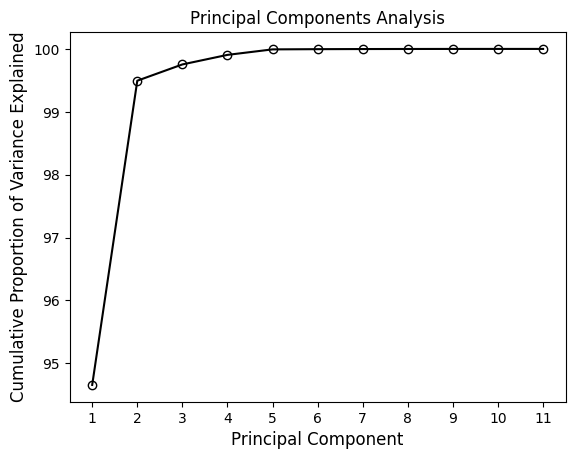

In [22]:
plt.plot(cum_var, 'k-o', markerfacecolor='None', markeredgecolor='k')
plt.title('Principal Components Analysis', fontsize=12)
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Cumulative Proportion of Variance Explained', fontsize=12)
plt.xticks(range(len(cum_var)), range(1, len(cum_var)+1))
plt.show()

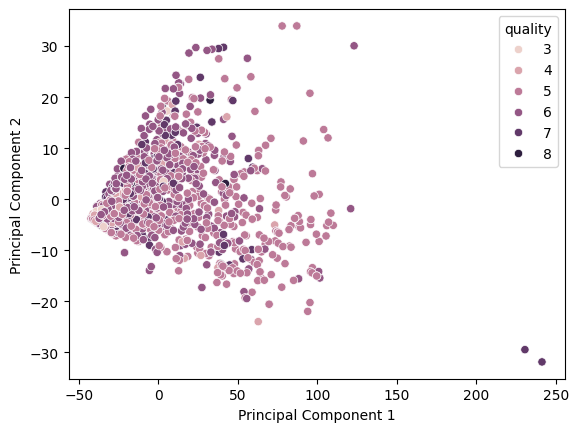

In [17]:
sns.scatterplot(data=wine_pca, x='PC1', y='PC2', hue='quality')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [25]:
svd = TruncatedSVD(n_components=5)
principal_components = svd.fit_transform(X)
wine_svd = pd.DataFrame(principal_components, 
                        columns=['PC'+str(i) for i in range(1, principal_components.shape[1]+1)])
wine_svd['quality'] = wine_data['quality']
var = svd.explained_variance_ratio_
cum_var = np.cumsum(var)*100

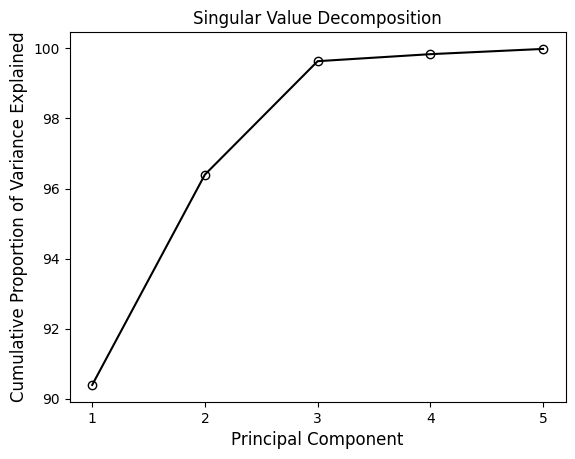

In [26]:
plt.plot(cum_var, 'k-o', markerfacecolor='None', markeredgecolor='k')
plt.title('Singular Value Decomposition', fontsize=12)
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Cumulative Proportion of Variance Explained', fontsize=12)
plt.xticks(range(len(cum_var)), range(1, len(cum_var)+1))
plt.show()

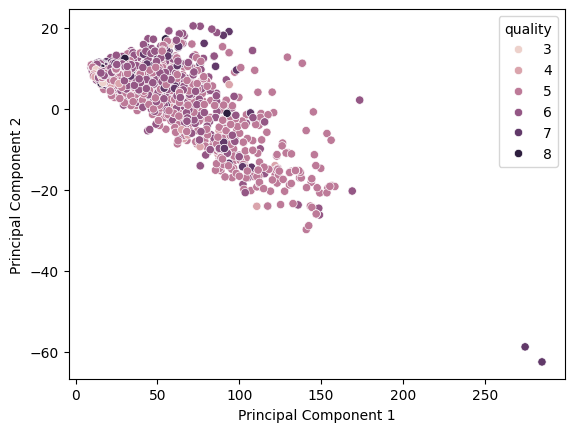

In [27]:
sns.scatterplot(data=wine_svd, x='PC1', y='PC2', hue='quality')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1599 samples in 0.008s...
[t-SNE] Computed neighbors for 1599 samples in 0.036s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1599
[t-SNE] Computed conditional probabilities for sample 1599 / 1599
[t-SNE] Mean sigma: 2.386995
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.235798
[t-SNE] KL divergence after 1000 iterations: 0.503609


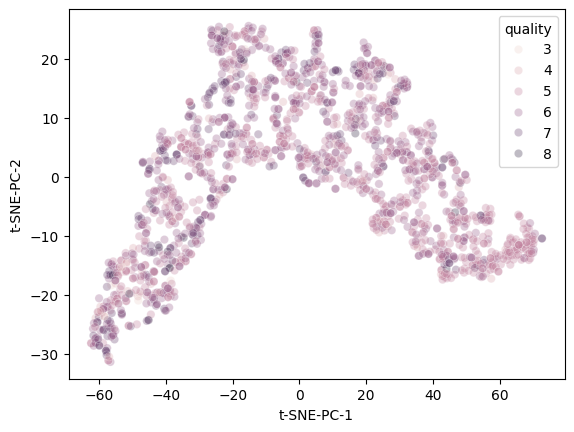

In [28]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40)
tsne_results = tsne.fit_transform(X)

wine_tsne = pd.DataFrame(tsne_results, columns=['t-SNE-PC-1', 't-SNE-PC-2'])
wine_tsne['quality'] = wine_data['quality']

sns.scatterplot(data=wine_tsne, x='t-SNE-PC-1', y='t-SNE-PC-2',
                hue='quality', legend='full', alpha=0.3)
plt.show()